## Clustering을 이용하여 sklearn 데이터 셋인 wine 데이터를 식별

## 1. 라이브러리와 데이터 불러오기

In [1]:
from sklearn.datasets import load_wine

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 1.1 데이터 전처리

In [2]:
X = wine['data']
y = wine['target']

In [13]:
# 와인 데이터 셋을 pandas dataframe을 이용하여 데이터 구조를 다루기 쉽게 변형한다.
df_wine = pd.DataFrame(X,columns = wine.feature_names)
y_name = pd.Series(y,dtype = 'category')
wine_class_name = y_name.cat.rename_categories(wine.target_names)
df_wine['class'] = pd.Series(wine_class_name)

In [14]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


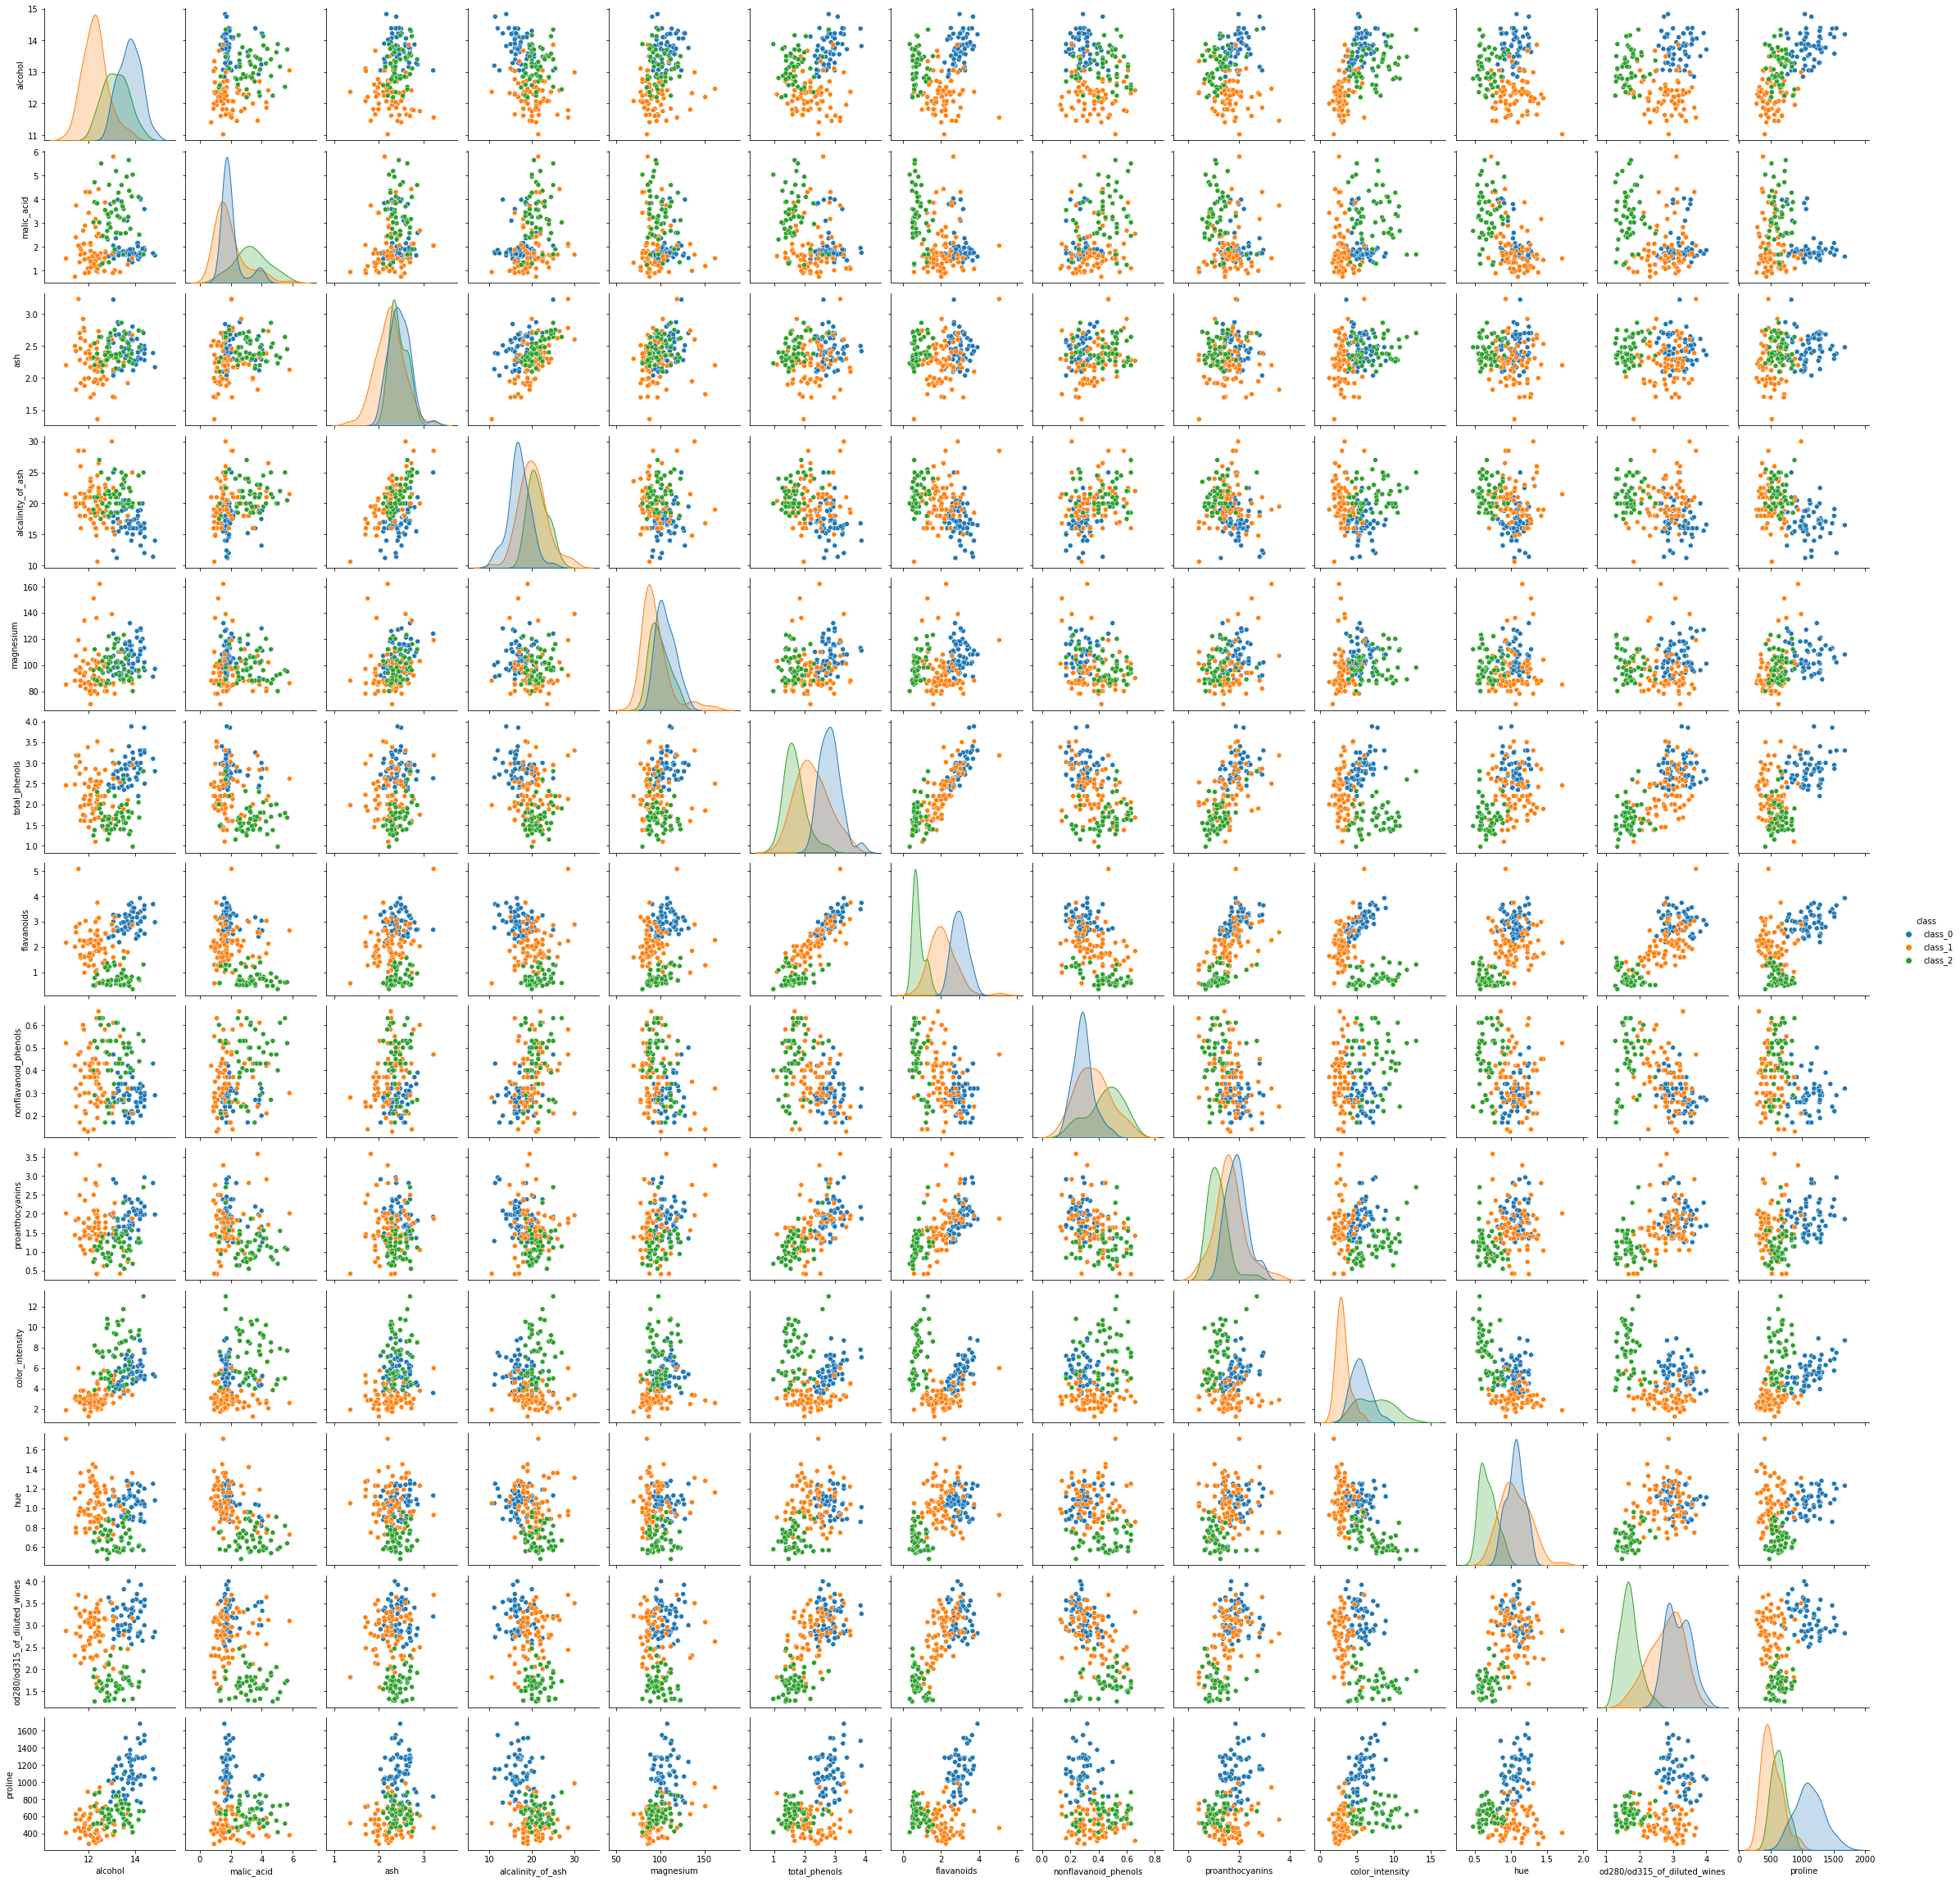

In [15]:
sns.pairplot(df_wine, hue = 'class')

위의 169개의 그래프는 13개의 특성들을 plot한 결과로 이중에서 'alcoho' - 'hue', 'alcoho' -'flavanoids', 'flavanoids' - 'color_intensity',
'hue' - 'proline', 'flavanoids' - 'alcalinity_of_ash'를 이용하여 clustering을 할 예정이다.

## 2. Clustering
 
 2.1 K - means clustering
 
 K - means clustering은 비지도 학습의 한 분야인 clustering 알고리즘 중 하나이다.
 
 K - means clustering은 주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작한다.

In [16]:
from sklearn.cluster import KMeans

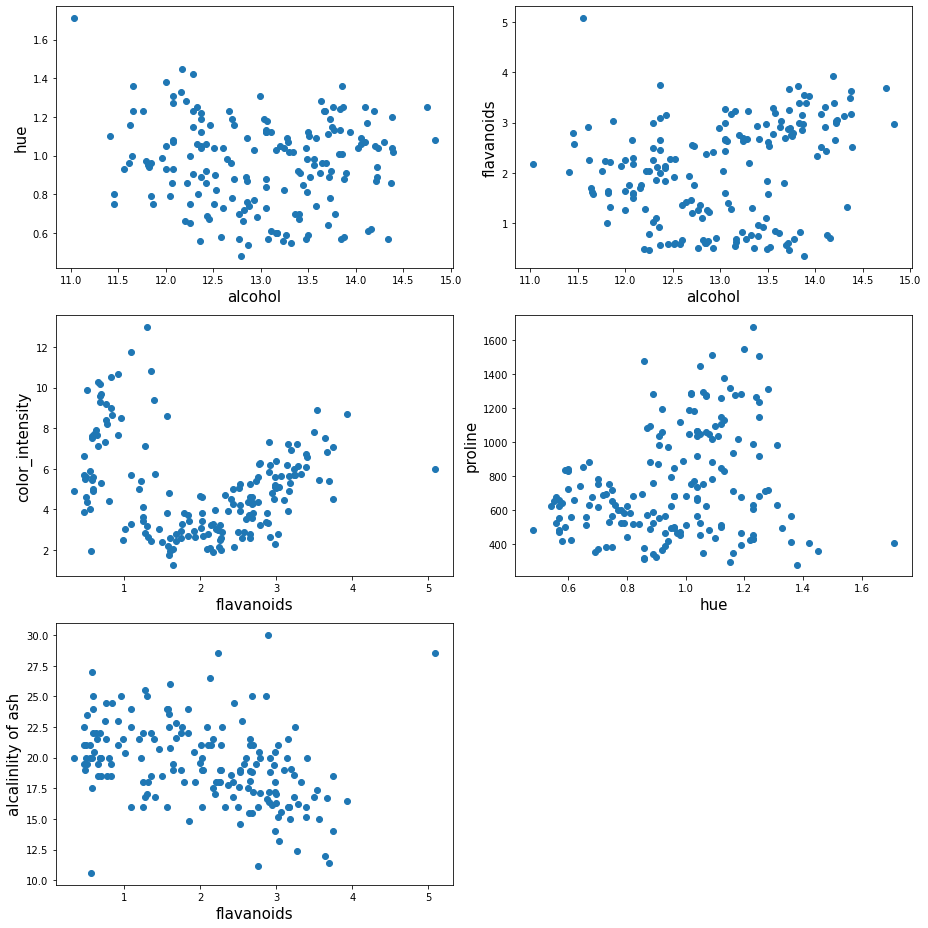

In [17]:
# k - means clustering을 위한 특성 데이터이다. 

X_1 = df_wine['alcohol']
X_2 = df_wine['hue']
X_3 = df_wine['flavanoids']
X_4 = df_wine['color_intensity']
X_5 = df_wine['proline']
X_6 = df_wine['alcalinity_of_ash']

plt.figure(figsize = (13,13))

plt.subplot(321)
plt.scatter(X_1,X_2)
plt.xlabel('alcohol',fontsize = 15)
plt.ylabel('hue',fontsize = 15)

plt.subplot(322)
plt.scatter(X_1,X_3)
plt.xlabel('alcohol',fontsize = 15)
plt.ylabel('flavanoids',fontsize = 15)

plt.subplot(323)
plt.scatter(X_3,X_4)
plt.xlabel('flavanoids',fontsize = 15)
plt.ylabel('color_intensity',fontsize = 15)

plt.subplot(324)
plt.scatter(X_2,X_5)
plt.xlabel('hue',fontsize = 15)
plt.ylabel('proline',fontsize = 15)

plt.subplot(325)
plt.scatter(X_3,X_6)
plt.xlabel('flavanoids',fontsize = 15)
plt.ylabel('alcalinlity of ash',fontsize = 15)

plt.tight_layout()

In [18]:
# K-menas clustering을 위한 cluster 갯수는 3개이다.

kmeans_1 = KMeans(n_clusters = 3)
kmeans_2 = KMeans(n_clusters = 3)
kmeans_3 = KMeans(n_clusters = 3)
kmeans_4 = KMeans(n_clusters = 3)
kmeans_5 = KMeans(n_clusters = 3)

X1 = [X_1, X_2]
X2 = [X_1, X_3]
X3 = [X_3, X_4]
X4 = [X_2, X_5]
X5 = [X_3, X_6]

point_1 = np.transpose(X1)
point_2 = np.transpose(X2)
point_3 = np.transpose(X3)
point_4 = np.transpose(X4)
point_5 = np.transpose(X5)

In [19]:
# 데이터 fiting 

kmeans_1.fit(point_1)
kmeans_2.fit(point_2)
kmeans_3.fit(point_3)
kmeans_4.fit(point_4)
kmeans_5.fit(point_5)

KMeans(n_clusters=3)

In [20]:
 # k means cluster로 구한 label를 문자열(class 0, class 1, class 2)로 바꾸어줌
    
km_result_1 = kmeans_1.labels_
km_result_2 = kmeans_2.labels_
km_result_3 = kmeans_3.labels_
km_result_4 = kmeans_4.labels_
km_result_5 = kmeans_5.labels_

wine_dict = {0:'class_0',1:'class_1',2:'class_2'}

wine_class_1 = []
wine_class_2 = []
wine_class_3 = []
wine_class_4 = []
wine_class_5 = []

 # k means cluster로 구한 label를 문자열(class 0, class 1, class 2)로 바꾸어줌
for i in km_result_1:
    wine = wine_dict[i]
    wine_class_1.append(wine)
    
for i in km_result_2:
    wine = wine_dict[i]
    wine_class_2.append(wine)

for i in km_result_3:
    wine = wine_dict[i]
    wine_class_3.append(wine)

for i in km_result_4:
    wine = wine_dict[i]
    wine_class_4.append(wine)

for i in km_result_5:
    wine = wine_dict[i]
    wine_class_5.append(wine)

In [21]:
# Cluster의 중심

cp_1 = kmeans_1.cluster_centers_
cp_2 = kmeans_2.cluster_centers_
cp_3 = kmeans_3.cluster_centers_
cp_4 = kmeans_4.cluster_centers_
cp_5 = kmeans_5.cluster_centers_

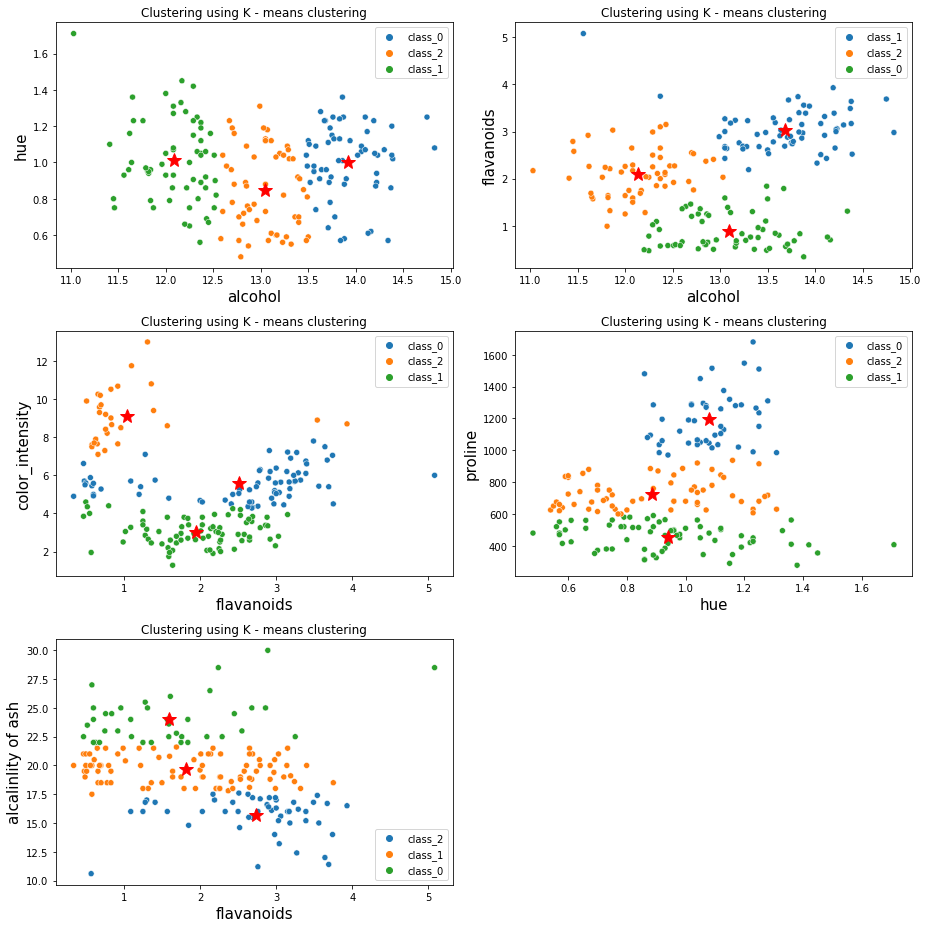

In [22]:
# k means clustering으로 구한 cluster를 plot한 결과이다.
# 붉은 색 별은 각 cluster의 중심이다.

plt.figure(figsize = (13,13))

plt.subplot(321)
plt.title('Clustering using K - means clustering')
sns.scatterplot(x=X_1,y=X_2,hue = wine_class_1)
plt.plot(cp_1[0][0],cp_1[0][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_1[1][0],cp_1[1][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_1[2][0],cp_1[2][1],marker = '*',color = 'red',markersize = 15)
plt.xlabel('alcohol',fontsize = 15)
plt.ylabel('hue',fontsize = 15)

plt.subplot(322)
plt.title('Clustering using K - means clustering')
sns.scatterplot(x=X_1,y=X_3,hue = wine_class_2)
plt.plot(cp_2[0][0],cp_2[0][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_2[1][0],cp_2[1][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_2[2][0],cp_2[2][1],marker = '*',color = 'red',markersize = 15)
plt.xlabel('alcohol',fontsize = 15)
plt.ylabel('flavanoids',fontsize = 15)

plt.subplot(323)
plt.title('Clustering using K - means clustering')
sns.scatterplot(x=X_3,y=X_4,hue = wine_class_3)
plt.plot(cp_3[0][0],cp_3[0][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_3[1][0],cp_3[1][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_3[2][0],cp_3[2][1],marker = '*',color = 'red',markersize = 15)
plt.xlabel('flavanoids',fontsize = 15)
plt.ylabel('color_intensity',fontsize = 15)

plt.subplot(324)
plt.title('Clustering using K - means clustering')
sns.scatterplot(x=X_2,y=X_5,hue = wine_class_4)
plt.plot(cp_4[0][0],cp_4[0][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_4[1][0],cp_4[1][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_4[2][0],cp_4[2][1],marker = '*',color = 'red',markersize = 15)
plt.xlabel('hue',fontsize = 15)
plt.ylabel('proline',fontsize = 15)

plt.subplot(325)
plt.title('Clustering using K - means clustering')
sns.scatterplot(x=X_3,y=X_6,hue = wine_class_5)
plt.plot(cp_5[0][0],cp_5[0][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_5[1][0],cp_5[1][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_5[2][0],cp_5[2][1],marker = '*',color = 'red',markersize = 15)
plt.xlabel('flavanoids',fontsize = 15)
plt.ylabel('alcalinlity of ash',fontsize = 15)

plt.tight_layout()

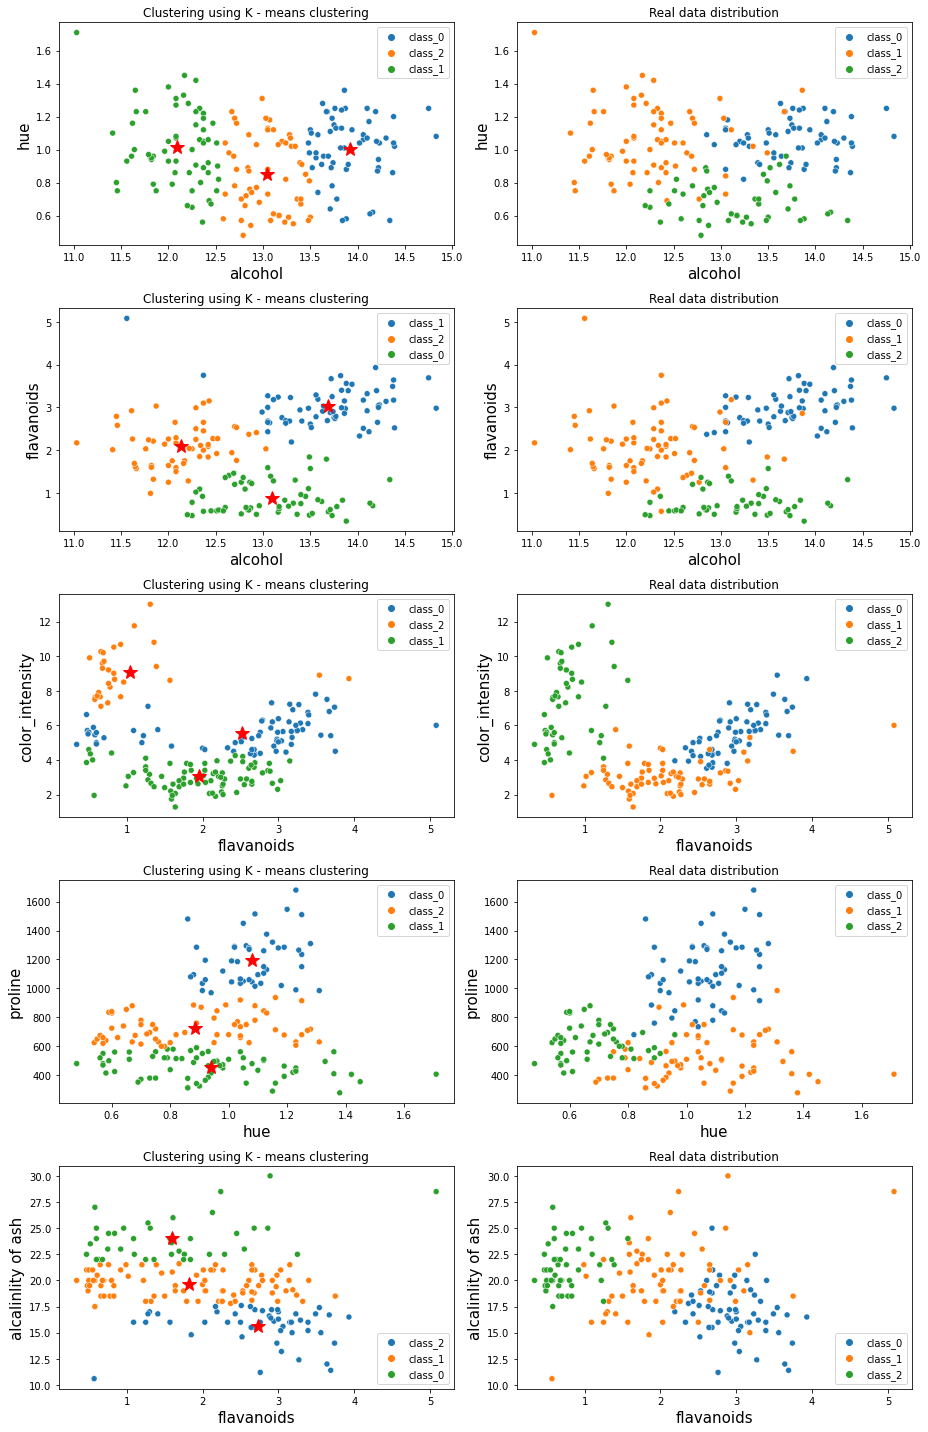

In [23]:
#왼쪽은 k means clsutering의 결과이고, 오른쪽은 실제 데이터 분포이다.

wine_target = []

for i in y:
    wine_data = wine_dict[i]
    wine_target.append(wine_data)

plt.figure(figsize = (13,20))

plt.subplot(521)
plt.title('Clustering using K - means clustering')
sns.scatterplot(x=X_1,y=X_2,hue = wine_class_1)
plt.plot(cp_1[0][0],cp_1[0][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_1[1][0],cp_1[1][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_1[2][0],cp_1[2][1],marker = '*',color = 'red',markersize = 15)
plt.xlabel('alcohol',fontsize = 15)
plt.ylabel('hue',fontsize = 15)

plt.subplot(522)
plt.title('Real data distribution')
sns.scatterplot(x=X_1,y=X_2,hue = wine_target)
plt.xlabel('alcohol',fontsize = 15)
plt.ylabel('hue',fontsize = 15)

plt.subplot(523)
plt.title('Clustering using K - means clustering')
sns.scatterplot(x=X_1,y=X_3,hue = wine_class_2)
plt.plot(cp_2[0][0],cp_2[0][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_2[1][0],cp_2[1][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_2[2][0],cp_2[2][1],marker = '*',color = 'red',markersize = 15)
plt.xlabel('alcohol',fontsize = 15)
plt.ylabel('flavanoids',fontsize = 15)

plt.subplot(524)
plt.title('Real data distribution')
sns.scatterplot(x=X_1,y=X_3,hue = wine_target)
plt.xlabel('alcohol',fontsize = 15)
plt.ylabel('flavanoids',fontsize = 15)

plt.subplot(525)
plt.title('Clustering using K - means clustering')
sns.scatterplot(x=X_3,y=X_4,hue = wine_class_3)
plt.plot(cp_3[0][0],cp_3[0][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_3[1][0],cp_3[1][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_3[2][0],cp_3[2][1],marker = '*',color = 'red',markersize = 15)
plt.xlabel('flavanoids',fontsize = 15)
plt.ylabel('color_intensity',fontsize = 15)

plt.subplot(526)
plt.title('Real data distribution')
sns.scatterplot(x=X_3,y=X_4,hue = wine_target)
plt.xlabel('flavanoids',fontsize = 15)
plt.ylabel('color_intensity',fontsize = 15)

plt.subplot(527)
plt.title('Clustering using K - means clustering')
sns.scatterplot(x=X_2,y=X_5,hue = wine_class_4)
plt.plot(cp_4[0][0],cp_4[0][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_4[1][0],cp_4[1][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_4[2][0],cp_4[2][1],marker = '*',color = 'red',markersize = 15)
plt.xlabel('hue',fontsize = 15)
plt.ylabel('proline',fontsize = 15)

plt.subplot(528)
plt.title('Real data distribution')
sns.scatterplot(x=X_2,y=X_5,hue = wine_target)
plt.xlabel('hue',fontsize = 15)
plt.ylabel('proline',fontsize = 15)

plt.subplot(529)
plt.title('Clustering using K - means clustering')
sns.scatterplot(x=X_3,y=X_6,hue = wine_class_5)
plt.plot(cp_5[0][0],cp_5[0][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_5[1][0],cp_5[1][1],marker = '*',color = 'red',markersize = 15)
plt.plot(cp_5[2][0],cp_5[2][1],marker = '*',color = 'red',markersize = 15)
plt.xlabel('flavanoids',fontsize = 15)
plt.ylabel('alcalinlity of ash',fontsize = 15)

plt.subplot(5,2,10)
plt.title('Real data distribution')
sns.scatterplot(x=X_3,y=X_6,hue = wine_target)
plt.xlabel('flavanoids',fontsize = 15)
plt.ylabel('alcalinlity of ash',fontsize = 15)

plt.tight_layout()

위의 결과를 보면 좌측에 있는 산개도가 k - means clustering 방법으로 얻은 클러스티이고, 우측에 있는 산개도가 실제 데이터 분포를 뜻한다.
이를 보면, k - means clustering 알고리즘으로 와인 클래스를 완벽하게 구별하지 못한 것을 볼 수 있었디.
이렇게 K - means clustering 알고리즘이 틀리게 와인 클래스를 구분하는 이유는, k - means 클러스터는 각 클러스터를 정의하는 것이 중심 하나 뿐이고, 모든 클러스터의 반경이 똑같다고 가정하기 때문이다.

## 2.1.1 엘보우 방법을 사용하여 k - means clustering의 최적의 cluster 갯수 찾기

앞서서 클러스터의 갯수를 wine class의 갯수에 따라 3개로 두고 코드를 짰다. 이를 확인하기 위해 inertia 값을 이용한다. Inertia란, 각 cluster 중심점에서 cluster 내의 데이터간의 거리를 합산한 값이다.


In [24]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(point_1)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'inertia')

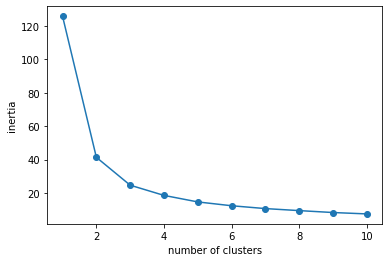

In [25]:
plt.plot(range(1,11), inertia,'-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')

위의 그래프를 보면 클러스터의 갯수가 3인 지점에서 기울기가 큰 폭으로 하강하는 것을 볼 수 있고, 이를 통해 k = 3일때가 클러스터의 갯수가 적절하다는 것을 볼 수 있다.

## 2.1.2   K - means clustering을 통해 얻은 군집의 실루엣 계수

실루엣 계수란 클러스터의 밀집 정도를 통해서 군집을 평가하는 척도이다. 실루엣 점수가 높을 수록 좋으며, 최대 점수는 1점이다.

In [26]:
from sklearn.metrics.cluster import silhouette_score

si_score_1 = silhouette_score(point_1,km_result_1)
si_score_2 = silhouette_score(point_2,km_result_2)
si_score_3 = silhouette_score(point_3,km_result_3)
si_score_4 = silhouette_score(point_4,km_result_4)
si_score_5 = silhouette_score(point_5,km_result_5)

print(si_score_1)
print(si_score_2)
print(si_score_3)
print(si_score_4)
print(si_score_5)

0.45691482457972304
0.49811703308582106
0.46388634214287316
0.5810076142597874
0.44006261400420155


위의 5개의 군집에 대한 실루엣 계수를 보면 약 0.5점인 것을 볼 수 있다. 하지만 이런 실루엣 계수는 밀집된 클러스터인 경우 잘 작동하지만, 모양이 복잡할 때는 잘 동작하지 않는 것으로 알려져있다.

## 2.1.3   타깃값으로 군집 평가하기: ARI(Adjusted Rand Index)

ARI는 실제 정답 클러스터가 있을 경우 사용할 수 있는 지표로서 최적일 때는 1 무작위로 분류 될 때는 0 값이 나온다.

In [27]:
from sklearn.metrics.cluster import adjusted_rand_score

ari_score_1 = adjusted_rand_score(y,km_result_1)
ari_score_2 = adjusted_rand_score(y,km_result_2)
ari_score_3 = adjusted_rand_score(y,km_result_3)
ari_score_4 = adjusted_rand_score(y,km_result_4)
ari_score_5 = adjusted_rand_score(y,km_result_5)

print(ari_score_1)
print(ari_score_2)
print(ari_score_3)
print(ari_score_4)
print(ari_score_5)

0.36693640842647773
0.7038700419517685
0.4350185801088505
0.37111371823084754
0.1472147574627734


이를 보면 두번째 데이터셋인 alcohol vs flavonoids 가 나머지 데이터 셋보다는 와인 클래스를 분류하기에 적합하다는 것을 볼 수 있었다.

여태까지의 논의에서는 시각화를 위해서 두가지 특성만들 이용하여 k - means clustering을 하였는데, 13개 특성 모두 사용하여 군집화를 할때 ARI 값이 얼마나 나오는지 확인한다.

In [70]:
X_1 = df_wine['alcohol']
X_2 = df_wine['hue']
X_3 = df_wine['flavanoids']
X_4 = df_wine['color_intensity']
X_5 = df_wine['proline']
X_6 = df_wine['alcalinity_of_ash']
X_7 = df_wine['malic_acid']
X_8 = df_wine['ash']
X_9 = df_wine['magnesium']
X_10 = df_wine['total_phenols']
X_11 = df_wine['nonflavanoid_phenols']
X_12 = df_wine['proanthocyanins']
X_13 = df_wine['od280/od315_of_diluted_wines']

X_all = [X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13]

point_all =np.transpose(X_all)

kmeans_all = KMeans(n_clusters = 3)
kmeans_all.fit(point_all)

KMeans(n_clusters=3)

In [71]:
km_result_all = kmeans_all.labels_
ari_score_all = adjusted_rand_score(y,km_result_all)
print(ari_score_all)

0.37111371823084754


위의 결과를 보면 모든 특성을 가지고 클러스터링을 할때 ARI는 약 0.37이 나왔다.
이를 통해 알 수 있는 점은 클러스터링에 사용되는 특성의 수가 많다고 항상 좋은 결과가 나온다는 것은 아니다라는 점이다.

그렇다면 두가지 특성을 가지고 얻을 수 있는 최대 ARI 값을 가지게 하는 특성은 무엇인지 알아본다.

In [115]:
Kmeans = KMeans(n_clusters = 3)
ARI = []

for i in X_all:
    for j in X_all:
        X_km = [i,j]
        point_km = np.transpose(X_km)
        Kmeans.fit(point_km)
        Kmeans_result = Kmeans.labels_
        ari_score = adjusted_rand_score(y,Kmeans_result)
        ARI.append(ari_score)

ARI = np.array(ARI)
print(np.max(ARI))

0.7171763686493966


In [120]:
print(np.where(ARI == 0.7171763686493966))

X_max = [X_1,X_13]
point_max = np.transpose(X_max)
Kmeans.fit(point_max)
Kmeans_result_max = Kmeans.labels_
ari_score_max = adjusted_rand_score(y,Kmeans_result_max)
print(ari_score_max)

(array([ 12, 156], dtype=int64),)
0.7171763686493966


alcohol 데이터와 od280/od315_of_diluted_wines데이터를 이용하면 ARI 값이 약 0.72로 두 개의 특성만을 이용해서 얻을 수 있는 최대 ARI 값이다.

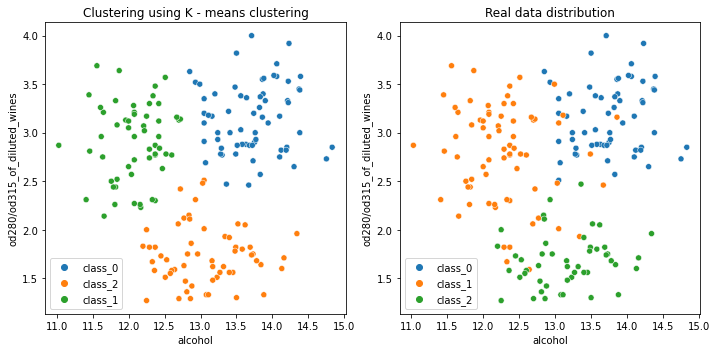

In [128]:
plt.rcParams["figure.figsize"] = (10,5)

wine_dict = {0:'class_0',1:'class_1',2:'class_2'}
wine_class_max = []
for i in Kmeans_result_max:
    wine  = wine_dict[i]
    wine_class_max.append(wine)

plt.subplot(121)
plt.title('Clustering using K - means clustering')
sns.scatterplot(x= X_1, y= X_13, hue =wine_class_max)

plt.subplot(122)
plt.title('Real data distribution')
sns.scatterplot(x=X_1, y= X_13, hue = wine_target)

plt.tight_layout()

## 2.2 병합 계층 군집(Agglomerative hierarchical clustering)
 각 샘플이 독립적인 클러스터가 되고 하나의 클러스터가 남을 떄까지 가장 가까운 클러스터를 합침

In [30]:
from sklearn.cluster import AgglomerativeClustering

# 병합 계층 군집에서 클러스터를 수를 지정해주면 계층 군집의 트리 성정을 일찍 멈출 수 있다.
# 데이터간의 거리 연결 함수를 유클리드 방식으로 한다.
# 클러스터 쌍에서 가장 비슷하지 않은 샘플을 비교하여 병합을 하는 완전 연결 방식으로 수행한다.

ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

# alcohol vs flavanoids 데이터 사용
labels = ac.fit_predict(point_2)

In [31]:
# 병합 계측 군집 알고리즘으로 얻은 예측 값
print(labels)

[2 0 0 2 0 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 0 0 0 0 0 0 1 0 2 2 2 0 0 0 0 0
 0 0 2 2 0 2 0 0 2 2 2 2 2 0 0 2 0 0 0 2 0 2 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


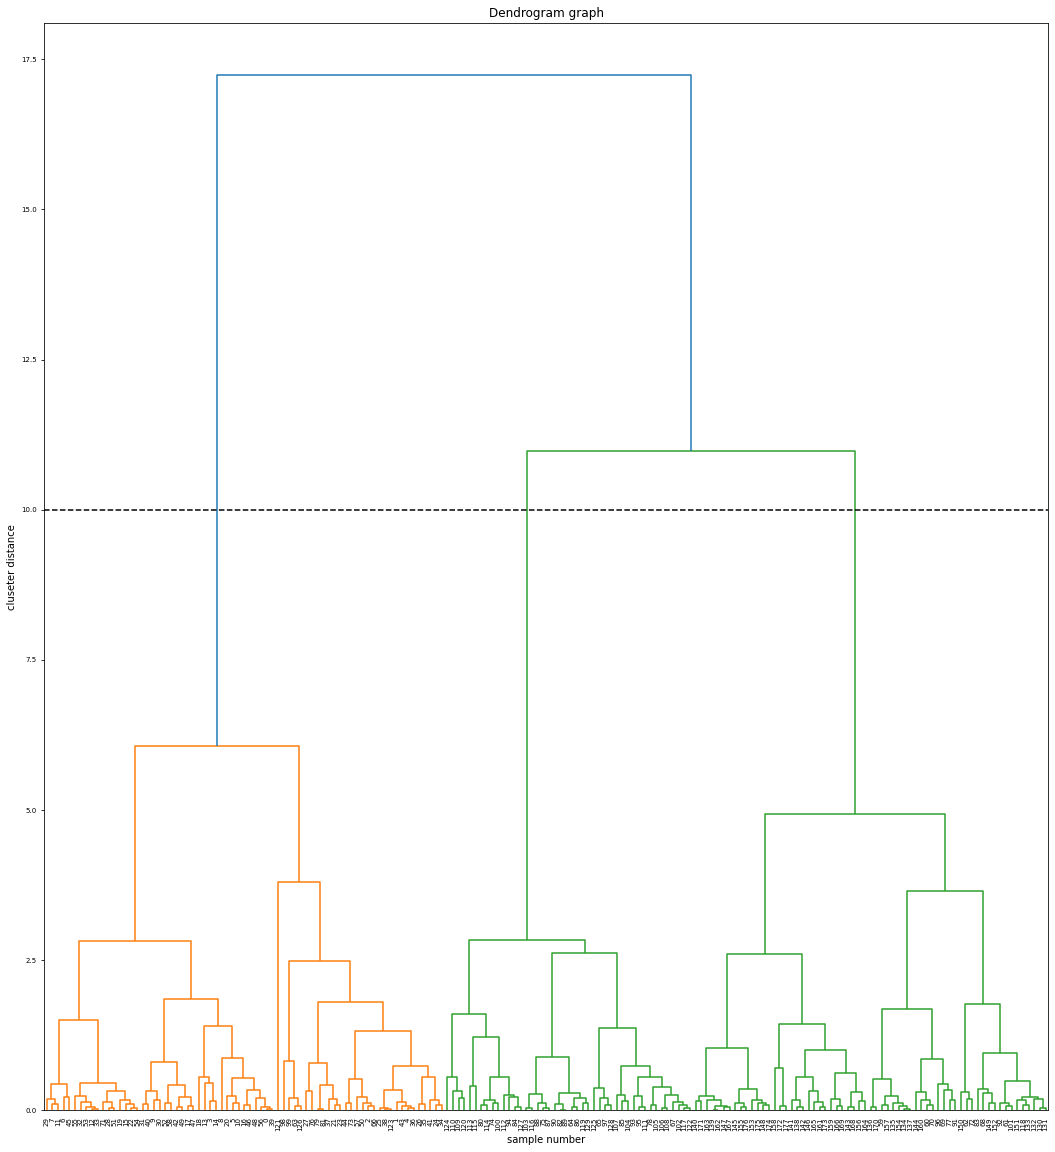

In [56]:
from scipy.cluster.hierarchy import ward,dendrogram

# ward 함수는 병합 군집을  수행할 때 생성된 거리 정보가 담긴 배열을 반환
linkage_array = ward(point_2)

dendrogram(linkage_array)

plt.title('Dendrogram graph')
plt.xlabel('sample number')
plt.ylabel('cluseter distance')
plt.xticks(fontsize =7)
plt.yticks(fontsize =7)
plt.hlines(10,0,10000,color='k',linestyles='--')
plt.rcParams["figure.figsize"] = (18,20)
plt.show()

덴드로그램에서 x축은 각각이 하나의 클러스터로.알고리즘이 진행되면서 각각의 클러스터들이 합쳐지면서 큰 클러스터를 형성하게 된다. 위의 검정색 선은 클러스터의 갯수가 3개인 지점을 뜻한다.

In [57]:
# data plot

wine_dict = {0:'class_0',1:'class_1',2:'class_2'}

wine_class_hc = []

 # k means cluster로 구한 label를 문자열(class 0, class 1, class 2)로 바꾸어줌
for i in labels:
    wine = wine_dict[i]
    wine_class_hc.append(wine)
    

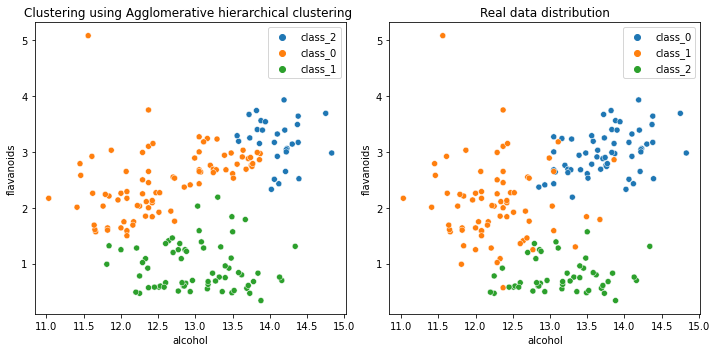

In [58]:
plt.rcParams["figure.figsize"] = (10,5)

plt.subplot(121)
plt.title('Clustering using Agglomerative hierarchical clustering ')
sns.scatterplot(x= X_1, y = X_3, hue = wine_class_hc)
plt.xlabel('alcohol')
plt.ylabel('flavanoids')

plt.subplot(122)
plt.title('Real data distribution')
sns.scatterplot(x= X_1, y = X_3, hue = wine_target)
plt.xlabel('alcohol')
plt.ylabel('flavanoids')

plt.tight_layout()

왼쪽 그림은 병합 계층 군집을 이용하여서 alcohol - flavanoids 데이터를 clustering을 한 결과이고, 오른쪽은 실제 alcohol - flavanoids 데이터의 분포이다. 이를 보면, 약간의 noise들이 있는 것을 볼 수 있다.

In [59]:
# 병합 계층 군집 방법을 통한 ARI 값
ari_score_hc = adjusted_rand_score(y,labels)
print(ari_score_hc)

0.42060670660555977


실제 병합 계층 군집을 통해서 얻은 ARI 값은 위에서 K - menas clustering으로 얻은 값보다는 낮게 나왔다는 것을 볼 수 있었다.

## 2.3 DBSCAN(Density - Based Spatial Clustering of Application with Noise)

DBSCAN 군집 알고리즘은 K means 알고리즘이나 Hierarchical 알고리즘 처럼 군집 간 거리에 기반으로 둔 알고리즘이 아닌 데이터간의 공간 밀도 차이를 이용하여 군집화를 하는 알고리즘이다.
데이터의 밀도가 큰 공간을 밀집 지역(Dense region)이라 하며, 밀집 지역 내의 핵심 포인트를 정의를 해야되는데 이를 정의하기 위해서는 두 개의 매개 변수 min_sample 와 eps가 필요하다.

한 데이터 포인트에서 eps 거리 안에 데이터가 min_sample 개수만큼 들어 있으면 해당 포인트를 핵심 포인트로 정의한다. eps 보다 가까운 핵심 샘플은 DBSCAN에 의해서 동일한 클러스터로 합쳐진다.

In [60]:
from sklearn.cluster import DBSCAN

# alcohol vs flavanoids 데이터 사용
# cluster의 갯수가 3개(0,1,2)가 나올 수 있는 eps 와 min_sample 갯수
cluster_list = []
for i in range(1,10,1):
    for j in np.arange(0.01,5.0,0.005):
        dbscan = DBSCAN(eps = j, min_samples = i)
        cluster_dbscan = dbscan.fit_predict(point_2)
        if np.max(cluster_dbscan) == 2:
            cluster_list.append(cluster_dbscan)


In [61]:
# -1의 갯수가 리스트 전체 원소 갯수의 절반 이상인 리스트를 제외한다.
cluster_DBSCAN = []
for i in range(len(cluster_list)):
    minus = (cluster_list[i] == -1).sum()
    if minus < len(cluster_list)/2:
        cluster_DBSCAN.append(cluster_list[i])
        
cluster_DBSCAN[-1]

array([ 0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  2, -1, -1,  0,  0,  0,  0,
        1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0, -1, -1,  0,  2,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0,  2,
        0, -1, -1,  0,  0, -1,  0, -1,  0,  0,  0,  2,  2,  2,  2,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2, -1,  2,  2,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

위의 값은 DBSCAN 알고리즘의 결과로 -1은 잡음 포인트를 의미한다.
이는 샘플 데이터셋에 적합하지 않은 eps와 min_samples의 기본값 때문이다.

In [62]:
len(cluster_DBSCAN)

32

In [63]:
# cluster_DBSCAN의 갯수도 많아서 실루엣 계수를 이용하여 리스트의 크기를 더 줄인다.
# 실루엣 계수가 0.2 보다 큰 데이터만을 남긴다.

cluster_db = []
for i in cluster_DBSCAN:
    if silhouette_score(point_2,i)> 0.2:
        cluster_db.append(i)

In [64]:
print(len(cluster_db))

db_point_1 = cluster_db[0]
db_point_2 = cluster_db[1]
db_point_3 = cluster_db[2]

3


In [65]:
wine_dict = {0:'class_0',1:'class_1',2:'class_2',-1:'noise'}

wine_class_dp_1 = []
wine_class_dp_2 = []
wine_class_dp_3 = []

 # DBSCAN으로 구한 값을 문자열(class 0, class 1, class 2,noise)로 바꾸어줌
for i in db_point_1:
    wine = wine_dict[i]
    wine_class_dp_1.append(wine)
    
for i in db_point_2:
    wine = wine_dict[i]
    wine_class_dp_2.append(wine)
    
for i in db_point_3:
    wine = wine_dict[i]
    wine_class_dp_3.append(wine)


In [66]:
# DBSCAM으로 구한 3개의 결과의 ARI 값

ari_score_db_1 = adjusted_rand_score(y,db_point_1)
ari_score_db_1 = np.round(ari_score_db_1,2)

ari_score_db_2 = adjusted_rand_score(y,db_point_2)
ari_score_db_2 = np.round(ari_score_db_2,2)

ari_score_db_3 = adjusted_rand_score(y,db_point_3)
ari_score_db_3 = np.round(ari_score_db_3,2)

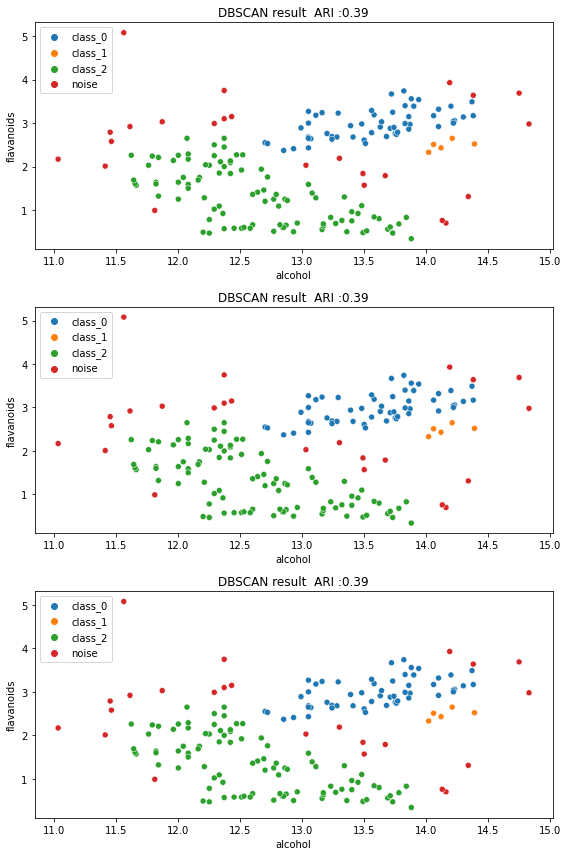

In [67]:
plt.rcParams["figure.figsize"] = (8,12)

plt.subplot(311)
plt.title('DBSCAN result'+'  '+ 'ARI :' + str(ari_score_db_1))
sns.scatterplot(x=X_1,y= X_3,hue = wine_class_dp_1,hue_order = ['class_0','class_1','class_2','noise'])

plt.subplot(312)
plt.title('DBSCAN result'+ '  '+'ARI :' + str(ari_score_db_2))
sns.scatterplot(x=X_1,y= X_3,hue = wine_class_dp_2,hue_order = ['class_0','class_1','class_2','noise'])

plt.subplot(313) 
plt.title('DBSCAN result'+'  ' +'ARI :' + str(ari_score_db_3))
sns.scatterplot(x=X_1,y= X_3,hue = wine_class_dp_3,hue_order = ['class_0','class_1','class_2','noise'])

plt.tight_layout()

위의 세개의 DBSCAN의 결과를 보면 동일한 결과가 나왔다는 것을 볼 수 있다.
그리고 ARI 값을 보면 약 0.39로 군집 형성이 제대로 이루어지지 않음을 볼 수 있다.


## 3. Conclusion

Alcohol vs flavanoids 데이터를 기준으로 K - means clustering, Agglomerative hierarchical clustering, DBSCAN 알고리즘의 ARI을 비교하면 다음과 같다.

ARI

K - means clustering: 0.70

Agglomerative hierarchical clustering: 0.42

DBSCAN: 0.39

이 결과가 절대적으로 K - means clustering이 다른 알고리즘보다 더 좋다는 것은 아니다. 단지 이 wine data set에서 K - menas clustering 방법이 조금 더 적절한 방법이란 것이다.

K - means clustering에서 가장 큰 ARI 값을 가질게 하는 특성의 조합은 alcohol 과 od280/od315_of_diluted_wines로 ARI 값은 0.71이다.